In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Data\\spam.csv',encoding = "windows-1252")

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2509,ham,U wake up already? Wat u doing? U picking us u...,NaN,NaN,NaN
4706,ham,Wif my family booking tour package.,NaN,NaN,NaN
4515,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,NaN,NaN,NaN
965,ham,Or better still can you catch her and let ask ...,NaN,NaN,NaN
3487,ham,Still i have not checked it da. . .,NaN,NaN,NaN
940,ham,No we sell it all so we'll have tons if coins....,NaN,NaN,NaN
3550,ham,I love you both too :-),NaN,NaN,NaN
4778,ham,O we cant see if we can join denis and mina? O...,NaN,NaN,NaN
962,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
# TODO 
# 1. Data Cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website Building
# 8. Deployment of the Website



## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...
2327,spam,URGENT! Your mobile number *************** WON...
5226,ham,Prabha..i'm soryda..realy..frm heart i'm sory
3220,spam,"Thanks for your ringtone order, reference numb..."
4631,ham,"I'm in a meeting, call me later at"


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.duplicated().sum()

403

In [16]:
df.shape

(5572, 2)

## 2. EDA

In [17]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

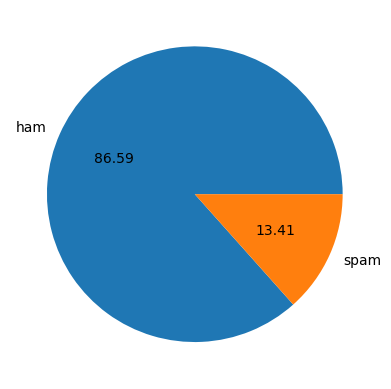

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
#Data is imbalance

In [20]:
import nltk

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
#Fetch number of words
df['num_words'] = df['text'].apply(lambda x:len( nltk.word_tokenize(x)) )

In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len( nltk.sent_tokenize(x)) )

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#Spam Messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

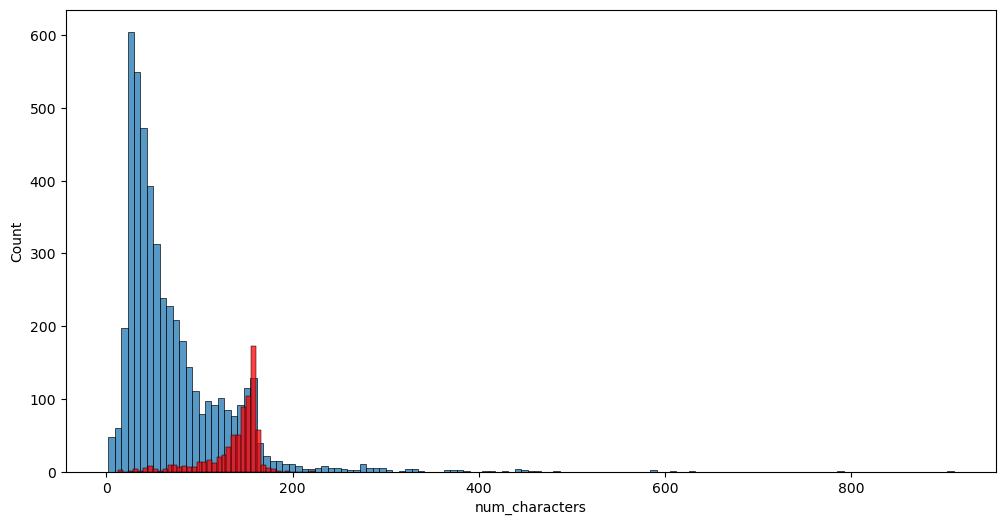

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

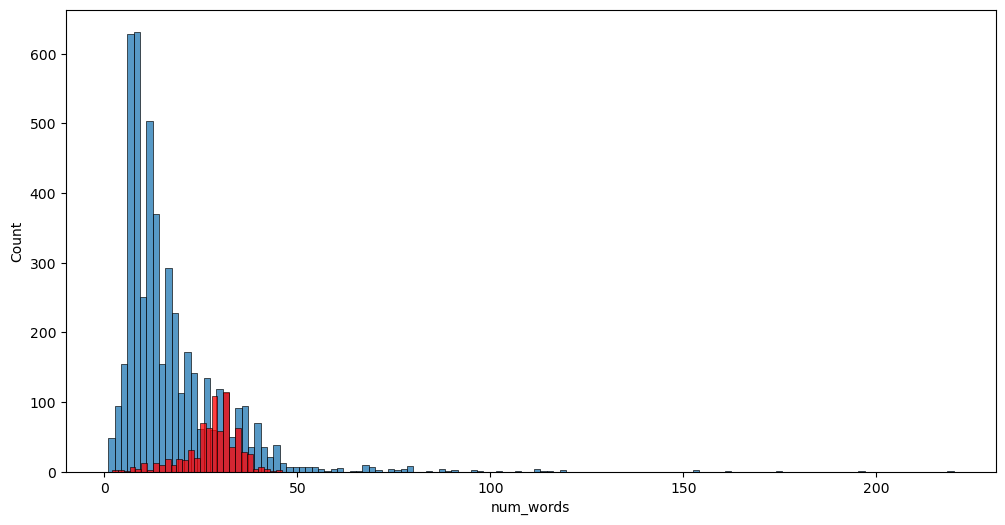

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

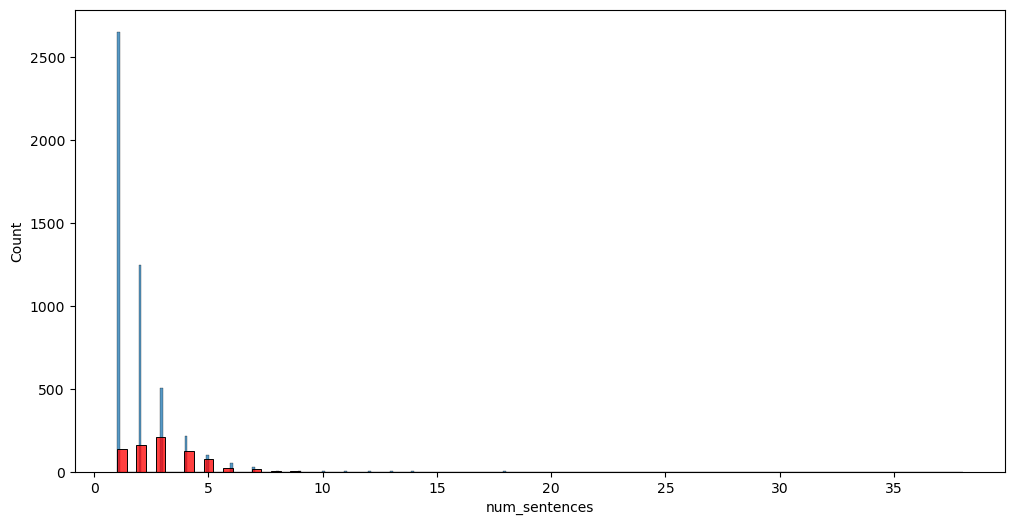

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

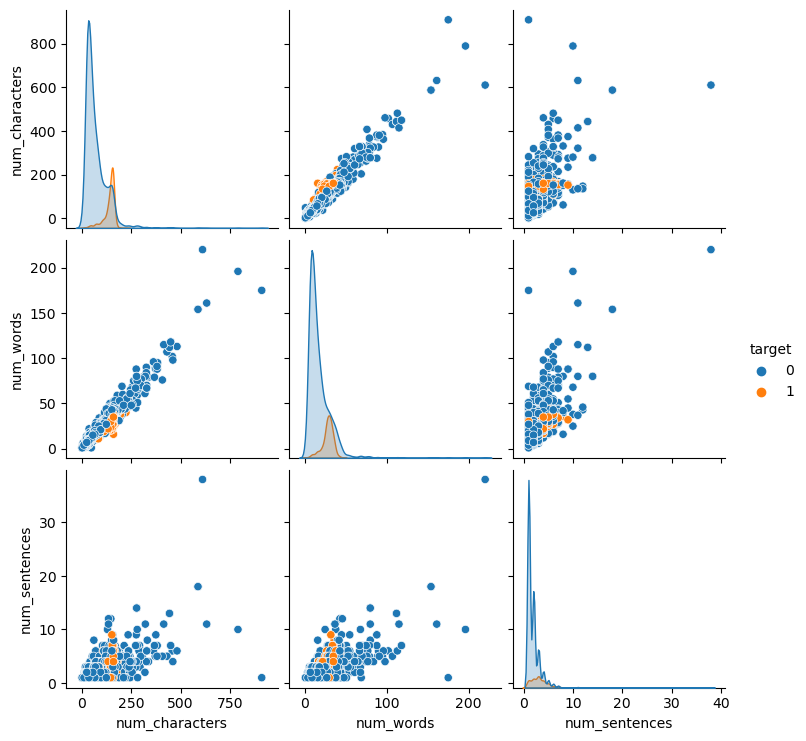

In [33]:
sns.pairplot(df,hue='target')

In [34]:
df.corr()

C:\Users\rajab\AppData\Local\Temp\ipykernel_3768\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


C:\Users\rajab\AppData\Local\Temp\ipykernel_3768\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

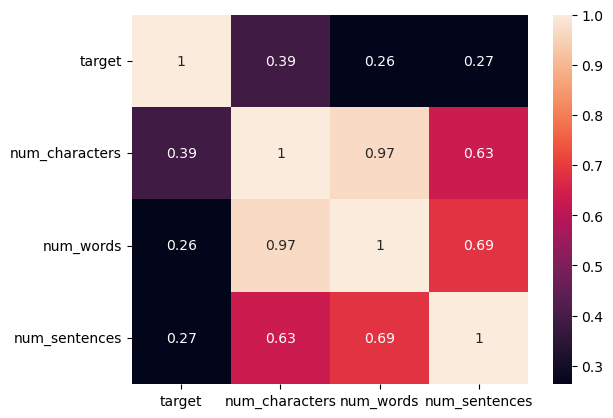

In [35]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower Case
- Tokenization
- Removing Specical Characters
- Removing stop words and punctuatioon
- Stemming

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = nltk.word_tokenize(text.lower())
    text = [word for word in text if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation]
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    return " ".join(text)


In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))   #spam

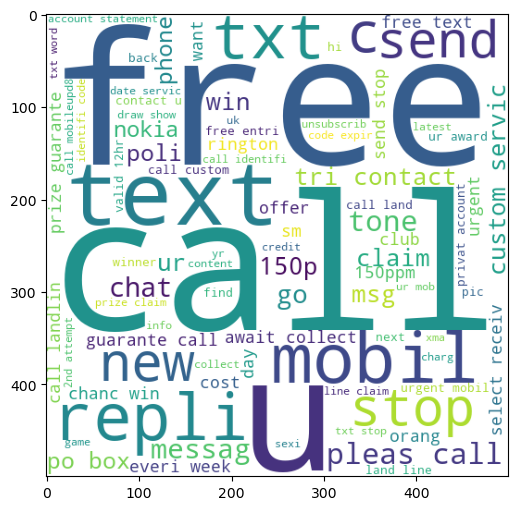

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))   #ham

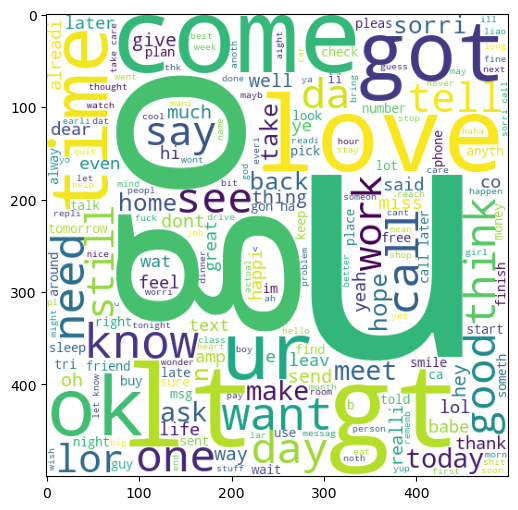

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
spam_corpus = [word for msg in df[df['target']==1]['transformed_text'] for word in msg.split()]

In [47]:
len(spam_corpus)

11490

In [48]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'u'),
  Text(6, 0, 'text'),
  Text(7, 0, 'mobil'),
  Text(8, 0, '4'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'stop'),
  Text(11, 0, 'repli'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'tone'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'new'),
  Text(18, 0, 'nokia'),
  Text(19, 0, 'award'),
  Text(20, 0, 'week'),
  Text(21, 0, 'cash'),
  Text(22, 0, 'urgent'),
  Text(23, 0, 'win'),
  Text(24, 0, 'contact'),
  Text(25, 0, 'pleas'),
  Text(26, 0, 'phone'),
  Text(27, 0, 'c'),
  Text(28, 0, 'custom'),
  Text(29, 0, 'collect')])

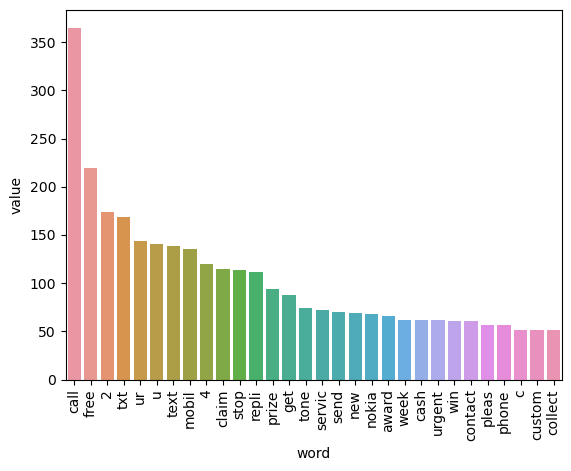

In [49]:
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
spam_df = spam_df.melt(id_vars='word', value_vars='count', var_name='variable', value_name='value')
sns.barplot(x='word', y='value', data=spam_df)
plt.xticks(rotation = 'vertical')

In [50]:
ham_corpus = [word for msg in df[df['target']==0]['transformed_text'] for word in msg.split()] #ham

In [51]:
len(ham_corpus)

38221

In [52]:
Counter(ham_corpus).most_common(30)

[('u', 979),
 ('go', 417),
 ('get', 357),
 ('gt', 318),
 ('lt', 316),
 ('2', 300),
 ('come', 295),
 ('call', 291),
 ('know', 248),
 ('ok', 245),
 ('like', 244),
 ('got', 242),
 ('love', 241),
 ('ur', 237),
 ('good', 230),
 ('time', 228),
 ('want', 212),
 ('day', 212),
 ('need', 174),
 ('one', 174),
 ('4', 163),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 153),
 ('think', 151),
 ('da', 150),
 ('take', 149),
 ('still', 148),
 ('n', 139)]

C:\Users\rajab\AppData\Local\Temp\ipykernel_3768\1759093417.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  ham_df = spam_df.melt(id_vars='word', value_vars='count', var_name='variable', value_name='value')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'u'),
  Text(6, 0, 'text'),
  Text(7, 0, 'mobil'),
  Text(8, 0, '4'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'stop'),
  Text(11, 0, 'repli'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'tone'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'new'),
  Text(18, 0, 'nokia'),
  Text(19, 0, 'award'),
  Text(20, 0, 'week'),
  Text(21, 0, 'cash'),
  Text(22, 0, 'urgent'),
  Text(23, 0, 'win'),
  Text(24, 0, 'contact'),
  Text(25, 0, 'pleas'),
  Text(26, 0, 'phone'),
  Text(27, 0, 'c'),
  Text(28, 0, 'custom'),
  Text(29, 0, 'collect')])

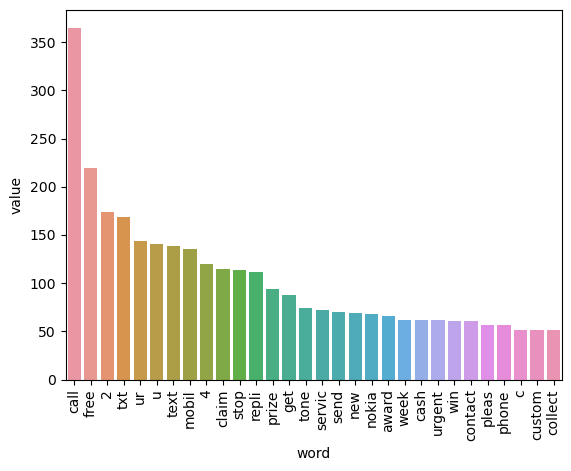

In [53]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
ham_df = spam_df.melt(id_vars='word', value_vars='count', var_name='variable', value_name='value')
sns.barplot(x='word', y='value', data=spam_df)
plt.xticks(rotation = 'vertical')

## 4. Model Building

In [54]:
# NB has best for the textual data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [55]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5572, 6708)

In [57]:
y = df['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## DATA IS IMBALANCE SO PRECISION_SCORE MATTER RATHER THAN ACCURARCY

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score   (y_test,y_pred1))
print(confusion_matrix (y_test,y_pred1))
print(precision_score  (y_test,y_pred1))

0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score   (y_test,y_pred2))
print(confusion_matrix (y_test,y_pred2))
print(precision_score  (y_test,y_pred2))

0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score   (y_test,y_pred3))
print(confusion_matrix (y_test,y_pred3))
print(precision_score  (y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


### Again Analysing the Data using the Tfidf Vectorizer Rather than the Previous CountVectorizer

In [66]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5572, 6708)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score   (y_test,y_pred1))
print(confusion_matrix (y_test,y_pred1))
print(precision_score  (y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score   (y_test,y_pred2))
print(confusion_matrix (y_test,y_pred2))
print(precision_score  (y_test,y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score   (y_test,y_pred3))
print(confusion_matrix (y_test,y_pred3))
print(precision_score  (y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


# TFIFD WITH MULTINOMIAL NAIVE BAYES IS BEST 
Though the accuracy is not high but it does not matter the most as it is attaining the high precison score
and Also we can see that the best part of the model is that it is giving is False Negative as 0 means "all the spam(False) are for sure classified as the spam(Negative)"

# Let not stick to this model only. Checking the other classifier present in the scikit-learn library

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB,ComplementNB,CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier,XGBRFClassifier

In [76]:
lrc = LogisticRegression    (solver = 'liblinear',penalty='l1')

svc = SVC(kernel='sigmoid',gamma=1.0)

bnb = BernoulliNB   ()
gnb = GaussianNB    ()
mnb = MultinomialNB ()

dtc = DecisionTreeClassifier(max_depth=5)

knc = KNeighborsClassifier     ()

abc = AdaBoostClassifier            (n_estimators=50,random_state=2)
bac = BaggingClassifier             (n_estimators=50,random_state=2)
etc = ExtraTreesClassifier          (n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier    (n_estimators=50,random_state=2)
rfc = RandomForestClassifier        (n_estimators=50,random_state=2)


xgb = XGBClassifier  (n_estimator = 50,random_state=2)
xfb = XGBRFClassifier(n_estimator = 50,random_state=2)

In [77]:
clfs = {
    'LINEAR REGRESSION': lrc,
    'SUPPORT VECTOR CLASSIFIER' : svc,
    'BERNOULLI NAIVE BAYES': bnb,
    'GAUSSIAN NAIVE BAYES': gnb,
    'MULTINOMIAL NAIVE BAYES': mnb,
    'DECISION TREE CLASSIFIER': dtc,
    'K NEAREST NEIGHBORS CLASSIFIER': knc,
    'ADABOOST CLASSIFIER': abc,
    'BAGGING CLASSIFIER': bac,
    'EXTRA TREES CLASSIFIER': etc,
    'GRADIENT BOOSTING CLASSIFIER': gbc,
    'RANDOM FOREST CLASSIFIER': rfc,
    'XGBOOST CLASSIFIER': xgb,
    'XGBOOST RANDOM FOREST CLASSIFIER': xfb
}


In [78]:
from sklearn.metrics import precision_score,accuracy_score

In [79]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accura = accuracy_score(y_test,y_pred)
    precis = precision_score(y_test,y_pred)
    return accura,precis

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    print("For : ",name)
    accuracy,precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("accuracy_score : ",accuracy)
    print("precision_score : ",precision)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For :  LINEAR REGRESSION
accuracy_score :  0.9443946188340807
precision_score :  0.9444444444444444
For :  SUPPORT VECTOR CLASSIFIER
accuracy_score :  0.9659192825112107
precision_score :  0.9761904761904762
For :  BERNOULLI NAIVE BAYES
accuracy_score :  0.9695067264573991
precision_score :  0.9920634920634921
For :  GAUSSIAN NAIVE BAYES
accuracy_score :  0.8690582959641255
precision_score :  0.5252100840336135
For :  MULTINOMIAL NAIVE BAYES
accuracy_score :  0.957847533632287
precision_score :  1.0
For :  DECISION TREE CLASSIFIER
accuracy_score :  0.9246636771300448
precision_score :  0.87
For :  K NEAREST NEIGHBORS CLASSIFIER
accuracy_score :  0.8986547085201794
precision_score :  1.0
For :  ADABOOST CLASSIFIER
accuracy_score :  0.9533632286995516
precision_score :  0.9344262295081968
For :  BAGGING CLASSIFIER
accuracy_score :  0.9587443946188341
precision_score :  0.9242424242424242
For :  EXTRA TREES CLASSIFIER
accuracy_score :  0.9695067264573991
precision_score :  1.0
For :  GRAD

In [81]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [82]:
performance_df

,Algorithms,Accuracy,Precision
4,MULTINOMIAL NAIVE BAYES,0.957848,1.000000
6,K NEAREST NEIGHBORS CLASSIFIER,0.898655,1.000000
9,EXTRA TREES CLASSIFIER,0.969507,1.000000
2,BERNOULLI NAIVE BAYES,0.969507,0.992063
11,RANDOM FOREST CLASSIFIER,0.965022,0.983740
12,XGBOOST CLASSIFIER,0.966816,0.976378
1,SUPPORT VECTOR CLASSIFIER,0.965919,0.976190
10,GRADIENT BOOSTING CLASSIFIER,0.942601,0.960784
0,LINEAR REGRESSION,0.944395,0.944444
7,ADABOOST CLASSIFIER,0.953363,0.934426


In [83]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithms')

In [84]:
performance_df1

,Algorithms,variable,value
0,MULTINOMIAL NAIVE BAYES,Accuracy,0.957848
1,K NEAREST NEIGHBORS CLASSIFIER,Accuracy,0.898655
2,EXTRA TREES CLASSIFIER,Accuracy,0.969507
3,BERNOULLI NAIVE BAYES,Accuracy,0.969507
4,RANDOM FOREST CLASSIFIER,Accuracy,0.965022
5,XGBOOST CLASSIFIER,Accuracy,0.966816
6,SUPPORT VECTOR CLASSIFIER,Accuracy,0.965919
7,GRADIENT BOOSTING CLASSIFIER,Accuracy,0.942601
8,LINEAR REGRESSION,Accuracy,0.944395
9,ADABOOST CLASSIFIER,Accuracy,0.953363


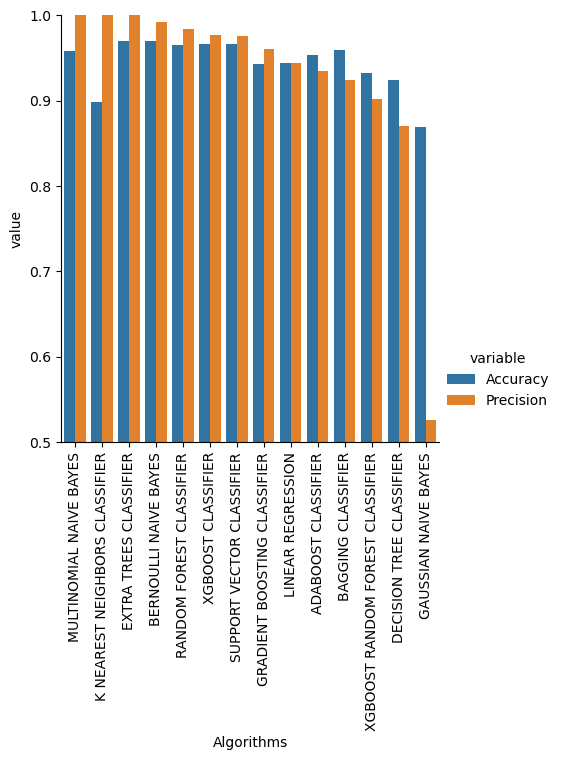

In [85]:
sns.catplot(x = 'Algorithms',y = 'value',hue = 'variable' ,data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

## 4.1 Trying with diffent number of features in the TF-idf Vectorizer (BEST FIT = 3000) 

In [86]:
# NB has best for the textual data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [87]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
X.shape

(5572, 3000)

In [89]:
y = df['target'].values

In [90]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
lrc = LogisticRegression    (solver = 'liblinear',penalty='l1')

svc = SVC(kernel='sigmoid',gamma=1.0)

bnb = BernoulliNB   ()
gnb = GaussianNB    ()
mnb = MultinomialNB ()

dtc = DecisionTreeClassifier(max_depth=5)

knc = KNeighborsClassifier     ()

abc = AdaBoostClassifier            (n_estimators=50,random_state=2)
bac = BaggingClassifier             (n_estimators=50,random_state=2)
etc = ExtraTreesClassifier          (n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier    (n_estimators=50,random_state=2)
rfc = RandomForestClassifier        (n_estimators=50,random_state=2)


xgb = XGBClassifier  (n_estimator = 50,random_state=2)
xfb = XGBRFClassifier(n_estimator = 50,random_state=2)

In [92]:
clfs = {
    'LINEAR REGRESSION': lrc,
    'SUPPORT VECTOR CLASSIFIER' : svc,
    'BERNOULLI NAIVE BAYES': bnb,
    'GAUSSIAN NAIVE BAYES': gnb,
    'MULTINOMIAL NAIVE BAYES': mnb,
    'DECISION TREE CLASSIFIER': dtc,
    'K NEAREST NEIGHBORS CLASSIFIER': knc,
    'ADABOOST CLASSIFIER': abc,
    'BAGGING CLASSIFIER': bac,
    'EXTRA TREES CLASSIFIER': etc,
    'GRADIENT BOOSTING CLASSIFIER': gbc,
    'RANDOM FOREST CLASSIFIER': rfc,
    'XGBOOST CLASSIFIER': xgb,
    'XGBOOST RANDOM FOREST CLASSIFIER': xfb
}


In [93]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    print("For : ",name)
    accuracy,precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("accuracy_score : ",accuracy)
    print("precision_score : ",precision)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For :  LINEAR REGRESSION
accuracy_score :  0.9443946188340807
precision_score :  0.9444444444444444
For :  SUPPORT VECTOR CLASSIFIER
accuracy_score :  0.9659192825112107
precision_score :  0.9761904761904762
For :  BERNOULLI NAIVE BAYES
accuracy_score :  0.9695067264573991
precision_score :  0.9920634920634921
For :  GAUSSIAN NAIVE BAYES
accuracy_score :  0.8690582959641255
precision_score :  0.5252100840336135
For :  MULTINOMIAL NAIVE BAYES
accuracy_score :  0.957847533632287
precision_score :  1.0
For :  DECISION TREE CLASSIFIER
accuracy_score :  0.9246636771300448
precision_score :  0.87
For :  K NEAREST NEIGHBORS CLASSIFIER
accuracy_score :  0.8986547085201794
precision_score :  1.0
For :  ADABOOST CLASSIFIER
accuracy_score :  0.9533632286995516
precision_score :  0.9344262295081968
For :  BAGGING CLASSIFIER
accuracy_score :  0.9587443946188341
precision_score :  0.9242424242424242
For :  EXTRA TREES CLASSIFIER
accuracy_score :  0.9695067264573991
precision_score :  1.0
For :  GRAD

In [94]:
performance_df_features_3000 = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_3000':accuracy_scores,'Precision_3000':precision_scores})
performance_df_features_3000

,Algorithms,Accuracy_3000,Precision_3000
0,LINEAR REGRESSION,0.944395,0.944444
1,SUPPORT VECTOR CLASSIFIER,0.965919,0.976190
2,BERNOULLI NAIVE BAYES,0.969507,0.992063
3,GAUSSIAN NAIVE BAYES,0.869058,0.525210
4,MULTINOMIAL NAIVE BAYES,0.957848,1.000000
5,DECISION TREE CLASSIFIER,0.924664,0.870000
6,K NEAREST NEIGHBORS CLASSIFIER,0.898655,1.000000
7,ADABOOST CLASSIFIER,0.953363,0.934426
8,BAGGING CLASSIFIER,0.958744,0.924242
9,EXTRA TREES CLASSIFIER,0.969507,1.000000


In [95]:
performance_df = performance_df.merge(performance_df_features_3000,on='Algorithms')

In [96]:
performance_df

,Algorithms,Accuracy,Precision,Accuracy_3000,Precision_3000
0,MULTINOMIAL NAIVE BAYES,0.957848,1.000000,0.957848,1.000000
1,K NEAREST NEIGHBORS CLASSIFIER,0.898655,1.000000,0.898655,1.000000
2,EXTRA TREES CLASSIFIER,0.969507,1.000000,0.969507,1.000000
3,BERNOULLI NAIVE BAYES,0.969507,0.992063,0.969507,0.992063
4,RANDOM FOREST CLASSIFIER,0.965022,0.983740,0.965022,0.983740
5,XGBOOST CLASSIFIER,0.966816,0.976378,0.966816,0.976378
6,SUPPORT VECTOR CLASSIFIER,0.965919,0.976190,0.965919,0.976190
7,GRADIENT BOOSTING CLASSIFIER,0.942601,0.960784,0.942601,0.960784
8,LINEAR REGRESSION,0.944395,0.944444,0.944395,0.944444
9,ADABOOST CLASSIFIER,0.953363,0.934426,0.953363,0.934426


## 4.2 Trying the Min Max Scaler (Doesnot Work)
I have used the MinMaxScaler as the Scaler for the Data rather than StandardScaler because the StandardScaler will result in negative values and the NB Classifier Doesnot work on the negative Value

In [97]:
# NB has best for the textual data
tfidf = TfidfVectorizer(max_features=3000)

In [98]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [100]:
lrc = LogisticRegression    (solver = 'liblinear',penalty='l1')

svc = SVC(kernel='sigmoid',gamma=1.0)

bnb = BernoulliNB   ()
gnb = GaussianNB    ()
mnb = MultinomialNB ()

dtc = DecisionTreeClassifier(max_depth=5)

knc = KNeighborsClassifier     ()

abc = AdaBoostClassifier            (n_estimators=50,random_state=2)
bac = BaggingClassifier             (n_estimators=50,random_state=2)
etc = ExtraTreesClassifier          (n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier    (n_estimators=50,random_state=2)
rfc = RandomForestClassifier        (n_estimators=50,random_state=2)


xgb = XGBClassifier  (n_estimator = 50,random_state=2)
xfb = XGBRFClassifier(n_estimator = 50,random_state=2)

In [101]:
clfs = {
    'LINEAR REGRESSION': lrc,
    'SUPPORT VECTOR CLASSIFIER' : svc,
    'BERNOULLI NAIVE BAYES': bnb,
    'GAUSSIAN NAIVE BAYES': gnb,
    'MULTINOMIAL NAIVE BAYES': mnb,
    'DECISION TREE CLASSIFIER': dtc,
    'K NEAREST NEIGHBORS CLASSIFIER': knc,
    'ADABOOST CLASSIFIER': abc,
    'BAGGING CLASSIFIER': bac,
    'EXTRA TREES CLASSIFIER': etc,
    'GRADIENT BOOSTING CLASSIFIER': gbc,
    'RANDOM FOREST CLASSIFIER': rfc,
    'XGBOOST CLASSIFIER': xgb,
    'XGBOOST RANDOM FOREST CLASSIFIER': xfb
}


In [102]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    print("For : ",name)
    accuracy,precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("accuracy_score : ",accuracy)
    print("precision_score : ",precision)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For :  LINEAR REGRESSION
accuracy_score :  0.9443946188340807
precision_score :  0.9444444444444444
For :  SUPPORT VECTOR CLASSIFIER
accuracy_score :  0.9659192825112107
precision_score :  0.9761904761904762
For :  BERNOULLI NAIVE BAYES
accuracy_score :  0.9695067264573991
precision_score :  0.9920634920634921
For :  GAUSSIAN NAIVE BAYES
accuracy_score :  0.8690582959641255
precision_score :  0.5252100840336135
For :  MULTINOMIAL NAIVE BAYES
accuracy_score :  0.957847533632287
precision_score :  1.0
For :  DECISION TREE CLASSIFIER
accuracy_score :  0.9246636771300448
precision_score :  0.87
For :  K NEAREST NEIGHBORS CLASSIFIER
accuracy_score :  0.8986547085201794
precision_score :  1.0
For :  ADABOOST CLASSIFIER
accuracy_score :  0.9533632286995516
precision_score :  0.9344262295081968
For :  BAGGING CLASSIFIER
accuracy_score :  0.9587443946188341
precision_score :  0.9242424242424242
For :  EXTRA TREES CLASSIFIER
accuracy_score :  0.9695067264573991
precision_score :  1.0
For :  GRAD

In [103]:
performance_df_MinMaxScaler = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_MinMaxScaler':accuracy_scores,'Precision_MinMaxScaler':precision_scores})

In [104]:
performance_df_MinMaxScaler

,Algorithms,Accuracy_MinMaxScaler,Precision_MinMaxScaler
0,LINEAR REGRESSION,0.944395,0.944444
1,SUPPORT VECTOR CLASSIFIER,0.965919,0.976190
2,BERNOULLI NAIVE BAYES,0.969507,0.992063
3,GAUSSIAN NAIVE BAYES,0.869058,0.525210
4,MULTINOMIAL NAIVE BAYES,0.957848,1.000000
5,DECISION TREE CLASSIFIER,0.924664,0.870000
6,K NEAREST NEIGHBORS CLASSIFIER,0.898655,1.000000
7,ADABOOST CLASSIFIER,0.953363,0.934426
8,BAGGING CLASSIFIER,0.958744,0.924242
9,EXTRA TREES CLASSIFIER,0.969507,1.000000


In [105]:
performance_df = performance_df.merge(performance_df_MinMaxScaler,on='Algorithms')

In [106]:
performance_df

,Algorithms,Accuracy,Precision,Accuracy_3000,Precision_3000,Accuracy_MinMaxScaler,Precision_MinMaxScaler
0,MULTINOMIAL NAIVE BAYES,0.957848,1.000000,0.957848,1.000000,0.957848,1.000000
1,K NEAREST NEIGHBORS CLASSIFIER,0.898655,1.000000,0.898655,1.000000,0.898655,1.000000
2,EXTRA TREES CLASSIFIER,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
3,BERNOULLI NAIVE BAYES,0.969507,0.992063,0.969507,0.992063,0.969507,0.992063
4,RANDOM FOREST CLASSIFIER,0.965022,0.983740,0.965022,0.983740,0.965022,0.983740
5,XGBOOST CLASSIFIER,0.966816,0.976378,0.966816,0.976378,0.966816,0.976378
6,SUPPORT VECTOR CLASSIFIER,0.965919,0.976190,0.965919,0.976190,0.965919,0.976190
7,GRADIENT BOOSTING CLASSIFIER,0.942601,0.960784,0.942601,0.960784,0.942601,0.960784
8,LINEAR REGRESSION,0.944395,0.944444,0.944395,0.944444,0.944395,0.944444
9,ADABOOST CLASSIFIER,0.953363,0.934426,0.953363,0.934426,0.953363,0.934426


## 4.3 Voting Classifier

In [107]:
from sklearn.ensemble import VotingClassifier


svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [108]:
voc = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [109]:
voc.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [123]:
X_test[0].shape

(6708,)

In [110]:
y_pred_vc = voc.predict(X_test)
print('Accuracy_score',accuracy_score(y_test,y_pred_vc))
print('Precision',precision_score(y_test,y_pred_vc))

Accuracy_score 0.9713004484304932
Precision 1.0


## 4.4 Stacking
In the voting Classifer each classifier have the equal weight But we can change their weightage by applying the stacking

In [111]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [112]:
from sklearn.ensemble import StackingClassifier

In [113]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [114]:
clf.fit(X_train,y_train)


StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [115]:
y_pred = clf.predict(X_test)
print('accuracy : ',accuracy_score(y_test,y_pred))
print('precision : ',precision_score(y_test,y_pred))

accuracy :  0.97847533632287
precision :  0.9785714285714285


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
input = "Hi"
transformed_text  = transform_text(input)
print([transformed_text])
tfidf = TfidfVectorizer(max_features=3000)
tfidf = tfidf.fit(df['transformed_text'])
tfidf.vocabulary_

['hi']


{'go': 997,
 'point': 1900,
 'crazi': 620,
 'avail': 307,
 'bugi': 445,
 'great': 1019,
 'world': 2932,
 'la': 1340,
 'cine': 540,
 'got': 1012,
 'wat': 2843,
 'ok': 1763,
 'lar': 1352,
 'joke': 1279,
 'wif': 2892,
 'oni': 1772,
 'free': 945,
 'entri': 805,
 'wkli': 2916,
 'comp': 574,
 'win': 2898,
 'fa': 848,
 'cup': 640,
 'final': 891,
 'tkt': 2621,
 '21st': 67,
 'may': 1533,
 'text': 2566,
 '87121': 153,
 'receiv': 2049,
 'question': 2002,
 'std': 2424,
 'txt': 2701,
 'rate': 2026,
 'appli': 265,
 'dun': 763,
 'say': 2178,
 'earli': 768,
 'hor': 1119,
 'alreadi': 233,
 'nah': 1665,
 'think': 2586,
 'goe': 1000,
 'usf': 2766,
 'live': 1413,
 'around': 280,
 'though': 2593,
 'freemsg': 947,
 'hey': 1087,
 'darl': 659,
 'week': 2860,
 'word': 2929,
 'back': 325,
 'like': 1398,
 'fun': 962,
 'still': 2431,
 'tb': 2537,
 'xxx': 2961,
 'chg': 522,
 'send': 2218,
 'rcv': 2029,
 'even': 820,
 'brother': 434,
 'speak': 2384,
 'treat': 2672,
 'per': 1846,
 'request': 2089,
 'mell': 1552,
 'o

In [152]:
X = tfidf.transform(df['transformed_text']).toarray()

In [181]:
tfidf.transform(['hi']).toarray().shape

(1, 3000)

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

In [159]:
X_train.shape,y_train.shape

((4457, 3000), (4457,))

In [160]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [166]:
[X_test[0]].shape

AttributeError: 'list' object has no attribute 'shape'

In [168]:
mnb.predict([X_test[1]]),y_test[1]

(array([0]), 0)

In [182]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [183]:
tfidf = pickle.load(open('vectorizer1.pkl','rb'))
tfidf

TfidfVectorizer(max_features=3000)

In [186]:
tfidf.transform(['hi']).toarray().shape

(1, 3000)

In [171]:
model = pickle.load(open('model.pkl','rb'))
model

MultinomialNB()

In [190]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [193]:
model.predict(X_test[:15]),y_test[:15]

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]))

In [178]:
input = "Hi"

# 1. Preprocess
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = nltk.word_tokenize(text.lower())
    text = [word for word in text if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation]
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    return [" ".join(text)]

transformed_text = transform_text(input)
print(transformed_text)
# 2. Vectorizer using the vectorizer
vector_input = tfidf.transform(transformed_text)
print("vector_input : ",vector_input)
print("\n\n\\n\n\nHi")
# 3. Predict using the Model
result = model.predict(vector_input)[0]

# # 4. Display Input
# if result==1:
#     st.header("Spam")
# else:
#     st.header("Not Spam")

['hi']
vector_input :    (0, 1088)	1.0


\n

Hi
